In [82]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Fetch Tesla data from Jan 2021 to Nov 2024
tsla = yf.download("TSLA", start="2021-01-01", end="2024-05-26")

# Use 'Close' and 'Volume' prices for prediction
data = tsla[['Close', 'Volume']].copy()


# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


# Parameters for sequence creation
seq_len = 6*30 
pred_len = 30  

# Create sequences
def create_sequences(data, seq_len, pred_len):
    s = []
    for i in range(len(data) - seq_len - pred_len + 1):
        s.append(data[i:i + seq_len + pred_len])  # Include features
    return np.array(s)

# Convert scaled data back to DataFrame with dates
data_scaled_df = pd.DataFrame(data_scaled, columns=['Close', 'Volume'], index=tsla.index)
s = create_sequences(data_scaled_df.values, seq_len, pred_len)

cut_off = int(.8 * s.shape[0])
X_train = s[:cut_off, :seq_len, :]  # Include all features in input
X_test = s[cut_off:, :seq_len, :]

y_train = s[:cut_off, seq_len:, 0]  # Use only "Close" as the output for prediction
y_test = s[cut_off:, seq_len:, 0]
tsla.iloc[cut_off+210]
print(cut_off+30)


[*********************100%***********************]  1 of 1 completed

546


In [83]:
tsla.iloc[cut_off+210]

Open         2.350400e+02
High         2.436200e+02
Low          2.333400e+02
Close        2.412000e+02
Adj Close    2.412000e+02
Volume       1.222880e+08
Name: 2023-11-21 00:00:00, dtype: float64

In [72]:
s.shape

(645, 210, 2)

In [75]:
from tensorflow.keras.layers import Flatten
# Build the model
model = Sequential([
    Flatten(input_shape=(seq_len, 2)),  # Flatten the 3D input into 2D: [samples, seq_len * features]
    Dense(180),
    LeakyReLU(),
    Dense(360),
    LeakyReLU(),
    Dense(360),
    LeakyReLU(),
    Dense(pred_len)  # Predict only "Close" prices
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,  # Pass 3D input directly
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_test, y_test)
)


Epoch 1/100


/home/mili/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1197 - val_loss: 0.0161
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0302 - val_loss: 0.0141
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - val_loss: 0.0191
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0184 - val_loss: 0.0093
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - val_loss: 0.0126
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - val_loss: 0.0080
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - val_loss: 0.0101
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - val_loss: 0.0117
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - val_loss: 0.0107
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - val_loss: 0.0121
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


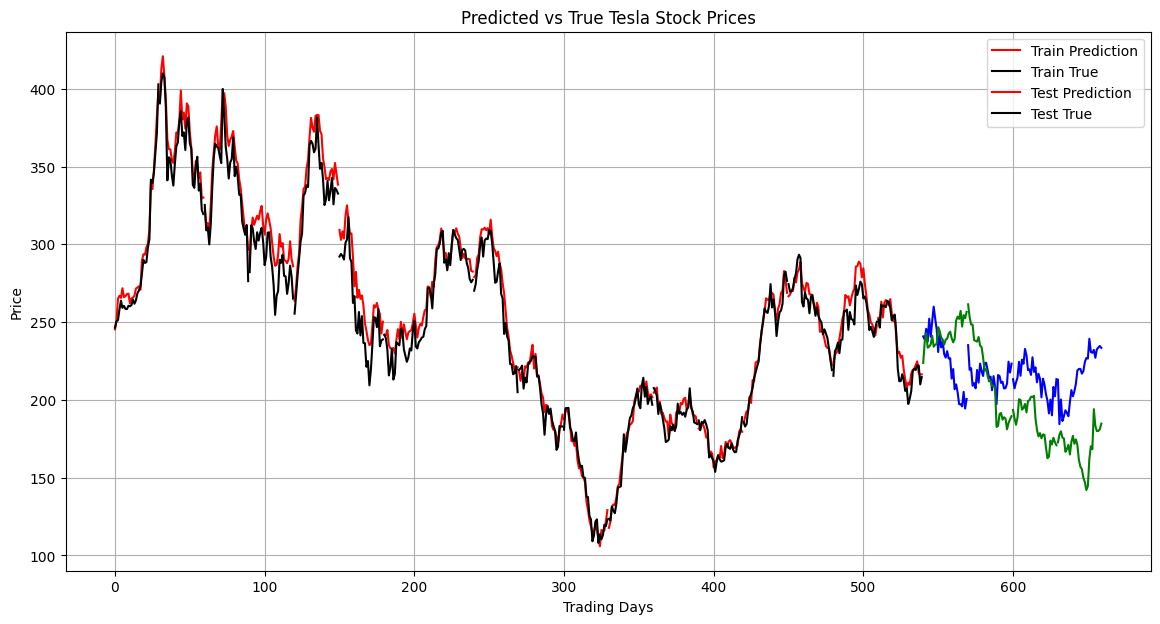

In [76]:
def predict_and_plot(s, model, ind):
    plt.figure(figsize=(14, 7))

    for idx in range(0, s.shape[0], 30):
        # Input remains in 3D for prediction
        future_input = s[idx, :seq_len, :].reshape(1, seq_len, -1)  # Keep the 3D shape
        future = model.predict(future_input)[0]  # Predict future "Close" prices

        # Pad the prediction with zeros for the "Volume" column
        future_padded = np.hstack((future.reshape(-1, 1), np.zeros((future.shape[0], 1))))

        # Inverse transform the padded prediction
        future_transform = scaler.inverse_transform(future_padded)[:, 0]  # Extract "Close"

        # Plot predictions
        plt.plot(
            np.arange(idx, idx + pred_len),
            future_transform,
            label="Train Prediction" if idx < cut_off else "Test Prediction",
            color="red" if idx < cut_off else "blue",
        )

        # Extract and inverse transform the true "Close" values
        future_true = s[idx, seq_len:, 0].reshape(-1, 1)  # Use only "Close"
        future_true_padded = np.hstack((future_true, np.zeros((future_true.shape[0], 1))))
        future_true_transform = scaler.inverse_transform(future_true_padded)[:, 0]  # Extract "Close"

        plt.plot(
            np.arange(idx, idx + pred_len),
            future_true_transform,
            label="Train True" if idx < cut_off else "Test True",
            color="black" if idx < cut_off else "green",
        )

    plt.title("Predicted vs True Tesla Stock Prices")
    plt.xlabel("Trading Days")
    plt.ylabel("Price")
    plt.legend(["Train Prediction", "Train True", "Test Prediction", "Test True"])
    plt.grid(True)
    plt.show()

# Call the function
predict_and_plot(s, model, 0)


In [ ]:
scaler.inverse_transform(s[-1,-seq_len:,[0]])

# Pywavelet

In [ ]:
import pywt

def wavelet_smooth(data, wavelet='db4', level=8):
    """
    Smooth data using Discrete Wavelet Transform (DWT).
    
    Parameters:
        data (array-like): The input signal (1D array).
        wavelet (str): The wavelet type to use.
        level (int): The level of decomposition.
        
    Returns:
        smoothed_data (array-like): The smoothed signal.
    """
    # Decompose the signal
    coeffs = pywt.wavedec(data, wavelet, mode='symmetric', level=level)
    
    # Zero out detail coefficients to remove noise
    coeffs[1:] = [np.zeros_like(detail) for detail in coeffs[1:]]
    
    # Reconstruct the signal
    smoothed_data = pywt.waverec(coeffs, wavelet, mode='symmetric')
    return smoothed_data
def smooth_sequences(sequences, wavelet='db4', level=8):
    """
    Apply wavelet smoothing to a set of sequences.
    
    Parameters:
        sequences (array-like): A 3D array (num_samples, seq_len, 1) or 2D array (num_samples, seq_len).
        wavelet (str): The wavelet type to use.
        level (int): The level of decomposition.
    
    Returns:
        smoothed_sequences (array-like): The smoothed sequences.
    """
    smoothed = []
    for seq in sequences:
        smoothed_seq = wavelet_smooth(seq.flatten(), wavelet=wavelet, level=level)  # Smooth the sequence
        smoothed.append(smoothed_seq)
    return np.array(smoothed).reshape(sequences.shape)  # Reshape to original shape

# Apply smoothing to X_train, X_test, y_train, y_test
X_train_smoothed = smooth_sequences(X_train)
y_train_smoothed = smooth_sequences(y_train)

X_test_smoothed = smooth_sequences(X_test)
y_test_smoothed = smooth_sequences(y_test)
# Build LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(64, activation='tanh'),
    Dense(pred_len)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train with smoothed data
history = model.fit(
    X_train_smoothed, y_train_smoothed,
    epochs=50,
    batch_size=32,
    verbose=1
)


In [ ]:
predict_and_plot(X, y, model,20)

In [ ]:
smoothed_predictions = model.predict(X_test_smoothed)
smoothed_predictions.shape

In [ ]:

# Transform predictions and true values back to the original scale
smoothed_predictions_rescaled = scaler.inverse_transform(smoothed_predictions)
smoothed_prediction_0 = smoothed_predictions_rescaled[0] # len 30
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, pred_len))

# Plot the predictions vs true values (November 2024)
plt.figure(figsize=(14, 7))

# Plot the last month's predictions vs true values
plt.plot(range(len(y_test_rescaled[0])), y_test_rescaled[0], label='True November 2024', color='blue')
plt.plot(range(len(predictions_rescaled[0])), predictions_rescaled[0], label='Predicted November 2024', linestyle='dashed', color='red')

plt.title('Predicted vs True Tesla Stock Prices')
plt.xlabel('Trading Days')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


In [ ]:
plt.plot(X_train[0])
plt.plot(X_train_smoothed[0])